<div style="text-align: center;">
  <h1>Assignment 2</h1>
  Andy Kaarup Harboe - kqr508
</div>

## Opgave 1
I denne opgave vil jeg importere den cleanede version af ``news_sample.csv`` fra *Assignment 1*, hvorefter jeg udforske datasættet for at se om der er nogle artikler der burde fjernes. Når dette er gjort vil jeg gruppere det resterende data i 2 grupper: *'fake'* og *'reliable'*. Slutteligt vil jeg analysere fordelingen af *fake* artikler versus *reliable* artikler, for at se om datasættet er balanceret.

Nedenfor bruger jeg ``read_csv`` funktionen fra ``pandas`` til at indlæse en filen ``cleaned_news_sample.csv``, som indeholder det samme som ``news_sample.csv``, bortset fra at alt indholdet i ``content`` kolonnen er blevet udskiften med en cleaned version. Filen ``cleaned_news_sample.csv`` er lavet på baggrund af cleaning processen fra *Assignment 1* og er blevet lavet til en csv-fil med ``to_csv`` funktionen fra ``pandas``.

In [1]:
import pandas as pd

cleaned_news_sample = pd.read_csv('cleaned_news_sample.csv')
cleaned_news_sample.head()


,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary
0,141,awm.com,unreliable,http://awm.com/church-congregation-brings-gift...,sometimes the power of christmas will make you...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Church Congregation Brings Gift to Waitresses ...,Ruth Harris,NaN,[''],NaN,NaN,NaN
1,256,beforeitsnews.com,fake,http://beforeitsnews.com/awakening-start-here/...,awakening of <NUM> strands of dna reconnecting...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,AWAKENING OF 12 STRANDS of DNA – “Reconnecting...,Zurich Times,NaN,[''],NaN,NaN,NaN
2,700,cnnnext.com,unreliable,http://www.cnnnext.com/video/18526/never-hike-...,never hike alone a <DATE> fan film usa | <DATE...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Never Hike Alone - A Friday the 13th Fan Film ...,NaN,NaN,[''],Never Hike Alone: A Friday the 13th Fan Film ...,NaN,NaN
3,768,awm.com,unreliable,http://awm.com/elusive-alien-of-the-sea-caught...,when a rare shark was caught scientists were l...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Elusive ‘Alien Of The Sea ‘ Caught By Scientis...,Alexander Smith,NaN,[''],NaN,NaN,NaN
4,791,bipartisanreport.com,clickbait,http://bipartisanreport.com/2018/01/21/trumps-...,donald trump has the unnerving ability to abil...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Trump’s Genius Poll Is Complete & The Results ...,Gloria Christie,NaN,[''],NaN,NaN,NaN


For at bestemme hvorvidt der er nogle og hvilke artikler der skal fjernes fra datasættet, forsøger jeg at finde artikler, som ville være problematiske eller ubrugelige i en fake-news detection model. Dette inkludere artikler som ikke har noget indhold, altså at ``content`` kolonnen er tom for denne artikel, og artikler som hverken høre under gruppen ``fake`` eller ``reliable``.

Først undersøger jeg om der nogle artikler, som har ``NaN`` som artiklens indhold.

In [2]:
cleaned_news_sample = cleaned_news_sample.dropna(subset=['content'])
cleaned_news_sample['content'].__len__()

250

Da længden af kolonnen er uændret betyder det at der ikke har været nogle artikler med ``NaN`` i ``content`` kolonnen. Desuden har jeg også overvejet at fjerne særligt korte artikler (kort længde eller lille ordforråd), da jeg tænkte at disse sandsynligvis var fejl eller artifakter og ville have lille eller såfrem negativ værdi for en fake-news detection model: Jeg valgte derimod at lade disse blive, da måske endda findes hyppigst i sådan kortform, som eksempel på Twitter (X) eller Facebook, som et opslag, som typisk ikke er særligt lange, og som en sådan fake-news detection model ville mange træning på hvis jeg fjernede alle artikler med en længde under en hvis grænseværdi.

Nedenfor har jeg lavet 2 serier, sorteret efter artiklernes længde og størrelsen af ordforrådet.

In [3]:
# Calculating article lengths
cleaned_news_sample['content'].apply(str.__len__).sort_values(ascending=1)[:15]

62      61
227     90
197     90
41      96
130    102
131    102
123    102
126    102
136    102
140    102
172    102
150    102
187    102
23     111
235    115
Name: content, dtype: int64

In [4]:
# Calculating vocab size
cleaned_news_sample['content'].apply(lambda x: set(x.split()).__len__()).sort_values(ascending=1)[:15]

62      9
41     15
123    15
126    15
136    15
140    15
130    15
131    15
172    15
187    15
150    15
197    17
227    17
235    18
234    18
Name: content, dtype: int64

Det ses ovenfor at artikel længde og ordforråds størrelse i høj grad går hånd i hånd, hvilket giver mening. Selvom jeg valgte ikke at fjerne de mindste artikler, opdagede jeg at der kan findes dubletter, hvilket er noget jeg vil forsøget at fjerne, da jeg forestiller mig at dubletterne kan være problematiske. Eksempler på sådanne dubletter er artiklerne med længde 102 eller 90.

In [5]:
cleaned_news_sample = cleaned_news_sample.drop_duplicates(subset='content', keep='first')
cleaned_news_sample.__len__()

239

Her ses det at der faktisk var dubletter, som jeg før konstaterede da der er blevet fjernet 11 artikler. Nedenfor har jeg tjækket at den faktisk har beholdt én af hver artikkel, altså at den har efterladt én artikkel tilbage, fra mængden af dubletter. Det ses at den umiddelbart har fjernet dubletterne korrekt.

In [6]:
cleaned_news_sample['content'].apply(str.__len__).sort_values(ascending=1)[:15]

62      61
197     90
41      96
123    102
23     111
234    115
5      135
16     146
6      201
11     253
7      310
100    313
14     322
27     340
158    399
Name: content, dtype: int64

Det næste jeg nu vil gøre er at bruge tabellen nedenfor, fra [GitHub]('https://github.com/several27/FakeNewsCorpus'), hvor der står en forklaring på alle de forskellige ``tag``'s, som findes i kolonnen ``type`` i datasættet, til at finde ud af hvilke artikler jeg ellers burde fjerne, baseret på hvilket tag de har fået, og hvordan jeg selv kan organisere dem i grupperne *fake* og *reliable*, ud fra definationerne i tabellen.

| Type | Tag | Description|
| ------------- |:-------------:|:-------------:|
| **Fake News** | fake | Sources that entirely fabricate information, disseminate deceptive content, or grossly distort actual news reports |
| **Satire** | satire | Sources that use humor, irony, exaggeration, ridicule, and false information to comment on current events. |
| **Extreme Bias** | bias | Sources that come from a particular point of view and may rely on propaganda, decontextualized information, and opinions distorted as facts. |
| **Conspiracy Theory** | conspiracy | Sources that are well-known promoters of kooky conspiracy theories. |
| **State News** | state | Sources in repressive states operating under government sanction. |
| **Junk Science** | junksci | Sources that promote pseudoscience, metaphysics, naturalistic fallacies, and other scientifically dubious claims. |
| **Hate News** | hate | Sources that actively promote racism, misogyny, homophobia, and other forms of discrimination. |
| **Clickbait** | clickbait | Sources that provide generally credible content, but use exaggerated, misleading, or questionable headlines, social media descriptions, and/or images. |
| **Proceed With Caution** | unreliable | Sources that may be reliable but whose contents require further verification. |
| **Political** | political | Sources that provide generally verifiable information in support of certain points of view or political orientations. |
| **Credible** | reliable | Sources that circulate news and information in a manner consistent with traditional and ethical practices in journalism (Remember: even credible sources sometimes rely on clickbait-style headlines or occasionally make mistakes. No news organization is perfect, which is why a healthy news diet consists of multiple sources of information). |


Nedenfor undersøger jeg hvilke type der optræder i dette datasæt. Her ses det at ``NaN`` også optræder, altså er der nogle artikler der helt mangler en type defination, ud fra tabellen ovenfor.

In [7]:
cleaned_news_sample['type'].value_counts(dropna=0)

type
fake          146
conspiracy     31
political      22
NaN            12
unreliable      6
unknown         6
bias            6
junksci         5
reliable        3
clickbait       1
hate            1
Name: count, dtype: int64

Ud fra tabellen og typerne tilstede i datasættet har jeg lavet følgende grupper:
- Fjernes:
    - NaN
    - unknown
    - unreliable
- Falsk:
    - fake
    - conspiracy
    - junksci
    - satire
- Utroværdig:
    - bias
    - state
    - hate
- Troværdig:
    - reliable
    - clickbait
    - political

Gruppen *Fjernes* består af de tags og tilhørende artikler, som skal fjernes fra datasættet, da de har lille eller ingen værdi til at træne en model, da det ikke vides hvilket kategori de høre ind under, og derfor kunne gøre mere skade end gavn.

Gruppen *Falsk* (*Fake*) er de tags, som ud fra ovenstående tabel definationer, må kunne defineres som opdigtede eller fordrejede i så høj grad at de ikke længere at tæt på en akkurat repræsentation af virkeligheden eller sandheden. Her har jeg valgt at *conspiracy* og *junksci* skal høre ind under *Falsk*, da disse omhandler emner, som er svagt eller helt mangler faktuelle belæg, og i nogle tilfælde er blevet modbevist. 

Gruppen *Troværdig* (*Reliable*) er de tags, som ovenstående tabel definere, som indeholdene faktuelt indhold, hvis sandhed kan verificeres. Jeg har valgt at *clickbait* og *political* høre ind under denne katogori, da disse selvom de kan være misvisende eller er biased i større eller mindre (men ikke ekstrem) grad, så er det stadig faktuelt indhold og verificerbart indhold.

Gruppen *Utroværdig* er de tags som ud fra ovenstående definationer, er i en sådan gråzone mellem sand og falsk, da *hate* overvejende er meningstekster, som ikke nødvendigvis indeholder løgne, da *state* som fordræjer sandheden, men i større eller mindre grad kan basere sig på sandheden, og *bias* som kan gøre brug af propaganda eller misbruge information, på en måde der fordrejer sandheden. Derfor mener jeg egentlig at de er en gruppe for sig selv, men da jeg skal klassificere alle artikler jeg beholder, som enten *Fake* eller *Reliable* mener jeg at da de i hvert fald ikke høre under *Reliable* grundet deres svage grundlag i sandheden og fordrejning af virkeligheden, må de høre under *Fake*.

Dermed fås grupperne:
- **Fake**:
    - fake
    - conspiracy
    - junksci
    - satire
    - bias
    - state
    - hate
- **Reliable**:
    - realiable
    - clickbait
    - political

Remove = {nan, unknown, unrealiable}
Fake = {fake, conspiracy, junksci, satire}
Unrealiable = {bias, state, hate}
Realiable = {realiable, clickbait, political}

In [8]:
cleaned_news_sample = cleaned_news_sample[~cleaned_news_sample['type'].isin(['unknown', 'unreliable'])].dropna(subset=['type'])
cleaned_news_sample.__len__()

215

Det ses at størrelsen af datasættet er faldet med yderligere 24 værdier.

Nu vil jeg så gruppere de resterende artikler under *fake* eller *reliable*, så disse er de eneste 2 tags tilbage i datasættet.

In [9]:
cleaned_news_sample = cleaned_news_sample.replace({'conspiracy':'fake', 'junksci':'fake', 'satire':'fake', 'bias':'fake', 'state':'fake', 'hate':'fake'})
cleaned_news_sample = cleaned_news_sample.replace({'clickbait':'reliable', 'political':'reliable'})
cleaned_news_sample[['type','content']]


,type,content
1,fake,awakening of <NUM> strands of dna reconnecting...
4,reliable,donald trump has the unnerving ability to abil...
6,fake,could you imagine waking up in the morgue i fo...
7,fake,citizen journalist\nby <URL> q has released se...
8,fake,usa dollar tanks on mnuchin statement that he ...
...,...,...
239,fake,the disturbing sugar daddy sugar baby relation...
243,fake,press\nbefore it s news ©\npeople powered news...
244,reliable,the senate voted late thursday to start work o...
245,fake,prison for rahm god s work and many others\nhe...


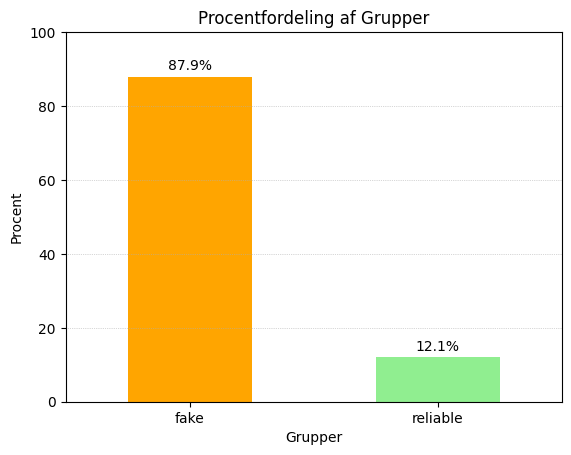

In [10]:
import matplotlib.pyplot as plot

group_procent = cleaned_news_sample['type'].value_counts(dropna=0).apply(lambda x: 100*x/cleaned_news_sample.__len__())
group_procent.plot(kind='bar', color=['orange', 'lightgreen'], title='Procentfordeling af Grupper', xlabel='Grupper', ylabel='Procent')
for i, v in enumerate(group_procent):
    plot.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')
plot.grid(True, axis='y', linestyle=':', linewidth=0.5)
plot.xticks(rotation=0)
plot.ylim(0, 100)
plot.show()

Ud fra figuren ovenfor over fordelingen af de forskellige typer artikler, er det tydeligt at se at der er betydeligt flere *fake* artikler end *reliable* artikler. En konsekvens ved et ubalanceret datasæt, altså hvor der er mange flere af den ene klasse end den anden, er at den endelige model kan blive biased mod den største klasse. Dette betyder at modellen i særlig høj grad vil klassificere nyt data til majoritetsklassen, som er er *fake*, da modellen under træningen vil opleve at minoritetsklassen har en relativ lille påvirkning på den endelige score. Dette kunne eksempelvis ske, hvis modellen klassificere flere *fake* forkeret, ved at klassificere en smule *reliable* rigtigt. Grundet dette bias, fås at baseline modellen **Sharp**, som gætter konstant *fake* eller *reliable*, får en høj præcision, hvis den konstant *fake* hvilket her ville blive en score på ca. 86,9%.

En anden konsekvens af en ubalanceret datasæt, kunne være at modellen ville have svære ved at lære at generelisere, da den kunne risikere i højere grad at memorere forskellene mellem *fake* og *reliable* fra træningsættet, istedet for at generelisere og finde et mønster i forskellene mellem *fake* g *reliable* Denne manglende generelisering kunne også betyde at modellen ikke er i stand til at forstå hvordan minoritetsklassen, som her er reliable, generelt ser ud, hvilket igen ville kunne betyde at når modellen møder noget der er helt anderledes fra træningssættet, så vil modellen være biased til at være majoritetsklassen.

## Opgave 2

I denne opgave vil jeg bruge ``selenium`` biblioteket til at skrabe noget af nyhedshjemmesiden BBC for dens artikler. Jeg vil starte med at skrabe en enkelt subsection for artikler, derefter flere sider under samme subsection, hvorefter jeg vil skrabe artiklerne fra flere subsections.

Nedenfor importere jeg ``webdriver`` fra ``selenium`` som jeg skal bruge til at interagere med hjemmesiden, og starter med at teste om det virker som det skal, ved at skalle HTML koden for hjemmesiden, hvorefter jeg manuelt checker om den skrapede HTML passer med den reelle HTML kode.

In [11]:
from selenium import webdriver

browser = webdriver.Firefox()
browser.get('https://www.bbc.com/news/world/europe')
html_content = browser.page_source
browser.quit()
print(html_content[:1000])

<html lang="en-GB"><head><meta charset="utf-8"><meta name="viewport" content="width=device-width"><title>Europe | Latest News &amp; Updates | BBC News</title><meta property="og:title" content="Europe | Latest News &amp; Updates | BBC News"><meta name="twitter:title" content="Europe | Latest News &amp; Updates | BBC News"><meta name="description" content="Get all the latest news, live updates and content about Europe from across the BBC."><meta property="og:description" content="Get all the latest news, live updates and content about Europe from across the BBC."><meta name="twitter:description" content="Get all the latest news, live updates and content about Europe from across the BBC."><meta name="msapplication-TileColor" content="#da532c"><meta name="theme-color" content="#ffffff"><meta name="robots" content="NOODP, NOYDIR"><meta name="apple-itunes-app" content="app-id=364147881, app-argument=https://www.bbc.com/news/world/europe"><link rel="apple-touch-icon" sizes="180x180" href="/bb

Både linket 'https://www.bbc.com/news/world/europe' optræder i HTML'en, men derudover optræder orden 'BBC' også mange gange, og ved stikprøve kontrol er HTML'en også ens med hjemmesidens HTML. Jeg vurdere derfor at koden virker som den skal, og er i stand til at skaffe informationer fra hjemmesiden.

Nu da jeg ved at koden er i stand til korrekt at skaffe informationer fra hjemmesiden, vil jeg lave en funktion der finder alle artiklerne på siden, hvorefter jeg ud fra de fundne artikler, vil ekstrahere deres link, overskrift og beskrivelse.

In [20]:
from selenium.webdriver.common.by import By
import pandas as pd

# starts browser and goes the website
browser = webdriver.Firefox()
browser.get('https://www.bbc.com/news/world/europe')

def get_page_articles(browser:webdriver.Firefox):
    # finds the news elements with: class="sc-c6f6255e-0 eGcloy"
    elements = browser.find_elements(By.CLASS_NAME, 'sc-c6f6255e-0.eGcloy') + browser.find_elements(By.CLASS_NAME, 'sc-23e03ea-0.ghfAIj')

    # extracts the article link, header, description
    page_articles = []
    for element in elements:
        try:
            page_articles.append({
                'link':element.find_element(By.CSS_SELECTOR, '[data-testid="internal-link"]').get_attribute('href'),
                'headline':element.find_element(By.CSS_SELECTOR, '[data-testid="card-headline"]').get_attribute('textContent'),
                'summary':element.find_element(By.CSS_SELECTOR, '[data-testid="card-description"]').get_attribute('textContent') if element.find_elements(By.CSS_SELECTOR, '[data-testid="card-description"]') else None
                })
        except:
            continue
    
    return pd.DataFrame(page_articles)

articles = get_page_articles(browser).drop_duplicates(subset='link').reset_index(drop=True)

# closes Firefox when done
browser.quit()

articles.head()

,link,headline,summary
0,https://www.bbc.com/news/articles/c70wnjvj1x0o,UK and France to present Ukraine peace plan to...,Sir Keir Starmer also says he believes the US ...
1,https://www.bbc.com/news/articles/ce34v17dw53o,His name was in a child abuse diary - now his ...,Former surgeon Joël Le Scouarnec is accused of...
2,https://www.bbc.com/news/articles/cgkmg3kmmero,Kurdish group PKK declares ceasefire with Turkey,The PKK calls for the release of its jailed le...
3,https://www.bbc.com/news/articles/c8x4qn74z2vo,'Our son died in Benidorm - we still don't kno...,Nathan Osman's family say attempts to use his ...
4,https://www.bbc.com/news/articles/cgr2g4n4wvdo,'Trump and Vance were so rude': Ukrainians rea...,"The more the country is attacked, the more uni..."


Ovenfor ses en dataframe med alle de unikke artikler fandtes på linket: [https://www.bbc.com/news/world/europe](https://www.bbc.com/news/world/europe), på tidspunktet for kørslen af funktionen. For at finde artiklerne har jeg ledt efter elementer af nogle bestemte klasser, og for at finde link, overskrift og beskrivelse har jeg ledt efter nogle underklasser med nogle bestemte attributes.

Med funktionen ``get_page_articles`` til at ekstrahere artikler fra den aktuelle side, laver jeg nedenfor en ny funktion ``get_section_articles``, som gør brug af den anden funktion til at skaffe artiklerne fra den aktuelle side, hvorefter den går til næste side og gør det igen, indtil den har skrabet alle artikler under den givne subsection.

In [13]:
import time

def get_section_articles(browser:webdriver.Firefox, article_acc:pd.DataFrame):
    # next page button is not disabled
    next_page = True

    while next_page:
        # waits for content to load
        time.sleep(0.01)

        # excrats current page articles
        article_acc = pd.concat([article_acc, get_page_articles(browser)])

        # gets next page button element
        next_button = browser.find_element(By.CSS_SELECTOR, '[data-testid="pagination-next-button"]')

        # clicks on the button, if not possible then makes it possible
        if next_button.get_attribute('disabled') != None:
            next_page = False
        else:
            try:
                next_button.click()
            except:
                browser.execute_script("document.getElementById('sp_message_container_1192447').style.display = 'none';")
                browser.execute_script("var element = document.getElementById('cookiePrompt'); if (element) { element.remove(); }")
                next_button.click()

    return article_acc

# starts browser and goes the website
browser = webdriver.Firefox()
browser.get('https://www.bbc.com/news/world/europe')

articles = get_section_articles(browser, pd.DataFrame()).drop_duplicates(subset='link').reset_index(drop=True)

# closes Firefox when done
browser.quit()

articles

,link,headline,summary
0,https://www.bbc.com/news/articles/c70wnjvj1x0o,UK and France to present Ukraine peace plan to...,Sir Keir Starmer also says he believes the US ...
1,https://www.bbc.com/news/articles/ce34v17dw53o,His name was in a child abuse diary - now his ...,Former surgeon Joël Le Scouarnec is accused of...
2,https://www.bbc.com/news/articles/cgkmg3kmmero,Kurdish group PKK declares ceasefire with Turkey,The PKK calls for the release of its jailed le...
3,https://www.bbc.com/news/articles/c8x4qn74z2vo,'Our son died in Benidorm - we still don't kno...,Nathan Osman's family say attempts to use his ...
4,https://www.bbc.com/news/articles/cgr2g4n4wvdo,'Trump and Vance were so rude': Ukrainians rea...,"The more the country is attacked, the more uni..."
...,...,...,...
104,https://www.bbc.com/news/articles/cjev2j70v19o,Trump calls Zelensky a 'dictator' as rift betw...,The comments come as the latest salvo in a pub...
105,https://www.bbc.com/news/articles/cvgwddmjyvzo,Trump says Russia 'has the cards' in Ukraine p...,Trump told the BBC that he trusted that Moscow...
106,https://www.bbc.com/news/articles/cj91xgylkwlo,Georgia's richest man said to be moving funds ...,The pro-Russian businessman is reported to be ...
107,https://www.bbc.com/news/articles/cx2e9w0n3pxo,"Pope's health slightly better, says Vatican",The 88-year-old pontiff was admitted to hospit...


De skrabede artikler fra [https://www.bbc.com/news/world/europe](https://www.bbc.com/news/world/europe) kan ses i dataframen ovenfor.

Med en funktion til at skrabe alle artiklerne fra en given subsection, bruger jeg nu ``ray`` biblioteket til at parallelisere denne funktion, så jeg hurtigere kan skrabe flere subsections. Nedenfor skraber jeg yderligere artikler fra subsectionerne: US & Canada, UK, Australia, Asia, Africa, Latin America og Middle East.

In [14]:
import ray

# starts ray
ray.shutdown()
ray.init()

# defines parallization funktion
@ray.remote
def get_section_articles_remote(section):
    # Start browser
    browser = webdriver.Firefox()
    browser.get(section)

    articles = get_section_articles(browser, pd.DataFrame())

    # closes Firefox when done
    browser.quit()

    return articles

sections = [
    'https://www.bbc.com/news/us-canada',
    'https://www.bbc.com/news/uk',
    'https://www.bbc.com/news/world/africa',
    'https://www.bbc.com/news/world/asia',
    'https://www.bbc.com/news/world/australia',
    'https://www.bbc.com/news/world/europe',
    'https://www.bbc.com/news/world/latin_america',
    'https://www.bbc.com/news/world/middle_east'
]

# start parallelization
results = ray.get([get_section_articles_remote.remote(section) for section in sections])

# combine the parallel results and remove duplicates
articles = pd.concat(results).drop_duplicates(subset='link').reset_index(drop=True)
articles


2025-03-02 18:43:35,584	INFO worker.py:1841 -- Started a local Ray instance.


,link,headline,summary
0,https://www.bbc.com/news/articles/cdxqnxw6z73o,Protesters target JD Vance in Vermont after cl...,They held up pro-Ukraine signs on the route th...
1,https://www.bbc.com/news/articles/cnvz566n523o,Most Republicans laud Trump after Zelensky sho...,The majority of Republicans say Zelensky was a...
2,https://www.bbc.com/news/articles/cvgwwyrnpzdo,Gene Hackman loved acting but 'hated everythin...,"Those who knew him discuss his brilliance, as ..."
3,https://www.bbc.com/news/articles/cd9208qv1kzo,Private spacecraft Blue Ghost lands on Moon,It was launched by Firefly Aerospace in Januar...
4,https://www.bbc.com/news/articles/c1d4r2nk4yyo,R&B hitmaker Angie Stone dead in car crash,The Wish I Didn't Miss You singer was involved...
...,...,...,...
854,https://www.bbc.com/news/articles/cx25x2lvk7ro,Lebanon ceasefire deal extended as initial dea...,Lebanon and the US said the agreement will rem...
855,https://www.bbc.com/news/articles/czeprnw4repo,Lebanon says 22 killed by Israeli forces after...,It comes as the deadline passes for Israeli fo...
856,https://www.bbc.com/news/articles/c6267kyp0eko,"'My beauty, you're home': Israeli women soldie...",The four women were taken hostage on 7 October...
857,https://www.bbc.com/news/articles/c8xqv5rqpyjo,Hamas names next Israeli hostages set to be re...,Four are due to be freed in a second exchange ...


Da jeg er endt op med en 800ish artikler, som var meningen ud fra opgavebeskrivelsen, vurdere jeg at det ser ud til at min funktion og paralleliseringen virker korrekt.

Nu vil jeg så gemme dataen fra de skrabede artikler som en csv-fil.

In [15]:
articles.to_csv('bbc_articles.csv', index=False)

## Opgave 3

I denne opgave vil jeg undersøge de skrabede artikler fra forrige opgave, for at finde nogle attributes, som jeg kan bruge til at ekstrahere overskriften, forfatter, udgivelsestidpunkt og indhold fra en givent artikkel. Dette vil jeg bruge til at lave en funktion der tager linket til en artikel og returnere et dictionary med fornævnte informationer, for til sidst at køre denne funktion på alle de artikler jeg skrabede i forrige opgave.

Nedenfor har jeg lavet funktion ``get_content`` som tager en Firefox browser og en URL, og returnere en dictionary med informationerne: overskrift, forfatter, udgivelsestidspunkt og indhold, fra artiklen. I funktionen har jeg impementeret error handling, så den er i stand til at lede efter informationer i forskellige formater, samt så den er i stand til at sætte den givne information til ``None`` hvis den ikke kan findes.

In [21]:
def get_content(browser:webdriver.Firefox, url:str):
    content = dict()

    browser.get(url)

    # get headline
    try:
        content['headline'] = browser.find_element(By.CSS_SELECTOR, '[data-component="headline-block"]').get_attribute('textContent')
    except:
        try:
            content['headline'] = browser.find_element(By.CLASS_NAME, 'sc-b7984e68-2.bAlPUK').get_attribute('textContent')
        except:
            content['headline'] = None
    
    # get author
    try:
        author = browser.find_element(By.CLASS_NAME, 'sc-b42e7a8f-7.kItaYD').get_attribute('textContent')
    except:
        try:
            author = browser.find_element(By.CSS_SELECTOR, '[data-testid="byline-new-contributors"]').get_attribute('textContent')
        except:
            try:
                author = browser.find_element(By.CSS_SELECTOR, '[data-component="byline-block"]').get_attribute('textContent')
            except:
                author = None
    content['author'] = author

    # get time
    try:
        content['time'] = browser.find_element(By.CSS_SELECTOR, '[datetime]').get_attribute('datetime')
    except:
        content['time'] = None
    
    # get content
    try:
        content['content'] = ''
        text_list = browser.find_elements(By.CSS_SELECTOR, '[data-component="text-block"]')
        if text_list:
            for text in text_list:
                content['content'] += text.get_attribute('textContent')
        else:
            content['content'] = browser.find_element(By.CLASS_NAME, 'sc-b7984e68-3.fxFApb').get_attribute('textContent')
    except:
        content['content'] = None
    
    return content

# showing that the function works and converting result to DataFrame for better visualization
browser = webdriver.Firefox()
df = pd.DataFrame()
for i in articles['link'][:10]:
    df = pd.concat([df, pd.DataFrame(get_content(browser, i), index=[0])]).reset_index(drop=True)
browser.quit()
df

,headline,author,time,content
0,UK and France to present Ukraine peace plan to...,Jennifer McKiernan,2025-03-02T15:27:11.903Z,Prime Minister Sir Keir Starmer has said the U...
1,His name was in a child abuse diary - now his ...,Laura Gozzi,2025-03-02T00:16:19.424Z,This story contains distressing details from t...
2,Kurdish group PKK declares ceasefire with Turkey,David Mercer,2025-03-02T00:33:45.194Z,Outlawed Kurdish group the PKK has declared a ...
3,'Our son died in Benidorm - we still don't kno...,Stephen Fairclough,2025-03-02T07:02:54.302Z,The family of a father-of-four who died while ...
4,'Trump and Vance were so rude': Ukrainians rea...,James Waterhouse,2025-03-01T12:03:47.610Z,Whether or not President Volodymyr Zelensky wa...
5,Pope absent from St Peter's Square for third week,Sarah Rainsford,2025-03-02T12:12:56.742Z,"For the third week in a row, Pope Francis has ..."
6,Were Tate brothers released in secret deal - o...,Andrew Harding,2025-03-01T00:34:57.863Z,These were already turbulent times in Romania....
7,Greeks hold mass protests demanding justice af...,Kostas Koukoumakas,2025-02-28T18:12:54.712Z,Greeks have held their largest protests in yea...
8,Dozens arrested in global hit against AI-gener...,Jack Burgess,2025-02-28T11:59:58.404Z,At least 25 arrests have been made during a wo...
9,Czech firefighters tackle large toxic train fire,Tom McArthur,2025-02-28T18:50:47.759Z,A freight train carrying the highly toxic chem...


Ovenfor har jeg kørt funktionen på 10 af de links jeg skrabede i forrige opgave, og resultatet har jeg koverteret til en dataframe for bedre visualisering.

For at køre funktionen ``get_content`` på alle de skrabede artikler, har jeg igen valgt at parallelisere opgaven med ``ray``, for at få det til at gå hurtigere. Måden hvorpå jeg gør dette er at jeg deler alle links'ne op i grupper af 80, og laver så en funktion, ``get_content_remote``, til at køre ``get_content`` på alle links'ne i en given gruppe.

In [17]:
# starts ray
ray.shutdown()
ray.init()

# defines parallization funktion
@ray.remote
def get_content_remote(urls:list[str]):
    # Start browser
    browser = webdriver.Firefox()

    # makes a list of dictionarys with 'headline','author','time','content' and 'link' (to combine with prevously scraped data)
    content_list = [get_content(browser, url)|{'link':url} for url in urls]

    # closes Firefox when done
    browser.quit()

    return content_list

# breaks the 850ish links up into chuncks
urls = articles['link']
chuncks = [urls[i:i + 80] for i in range(0, len(urls), 80)]

# start parallelization
results = ray.get([get_content_remote.remote(chunck) for chunck in chuncks])


2025-03-02 18:45:41,299	INFO worker.py:1841 -- Started a local Ray instance.


Nedenfor konverter jeg alle resultaterne til dataframes for at kunne samle det i én dataframe. Herefter vælger jeg at kombinere det skrabede indhold fra artiklerne, med det skrabede indhold om artiklerne, fra Opgave 2. Slutteligt gemmer jeg denne samlede dataframe som en ny csv-fil.

In [18]:
# converts results into a dataframe
scraped_articles = pd.concat([pd.DataFrame(result) for result in results]).reset_index(drop=True)
# merges the scraped data with the prevously scraped data (merges by link, and drops newly scraped headers, because prevously scraped headers was better)
scraped_articles = pd.merge(articles, scraped_articles[['time','author','content','link']], on='link')
# saves scraped data to a file
scraped_articles.to_csv('bbc_scaped_articles.csv')
scraped_articles

,link,headline,summary,time,author,content
0,https://www.bbc.com/news/articles/cdxqnxw6z73o,Protesters target JD Vance in Vermont after cl...,They held up pro-Ukraine signs on the route th...,2025-03-02T15:29:55.905Z,David Mercer,Protesters in the US have lined a road in Verm...
1,https://www.bbc.com/news/articles/cnvz566n523o,Most Republicans laud Trump after Zelensky sho...,The majority of Republicans say Zelensky was a...,2025-03-01T22:44:15.435Z,Max Matza,Most Republicans have backed US President Dona...
2,https://www.bbc.com/news/articles/cvgwwyrnpzdo,Gene Hackman loved acting but 'hated everythin...,"Those who knew him discuss his brilliance, as ...",2025-03-02T00:04:06.288Z,Noor Nanji,"""He loved being an actor, and hated all the st..."
3,https://www.bbc.com/news/articles/cd9208qv1kzo,Private spacecraft Blue Ghost lands on Moon,It was launched by Firefly Aerospace in Januar...,2025-03-02T10:43:47.369Z,George Sandeman,"A private spacecraft has landed on the Moon, b..."
4,https://www.bbc.com/news/articles/c1d4r2nk4yyo,R&B hitmaker Angie Stone dead in car crash,The Wish I Didn't Miss You singer was involved...,2025-03-01T21:56:09.925Z,Christal Hayes,Grammy-nominated R&B artist Angie Stone has di...
...,...,...,...,...,...,...
854,https://www.bbc.com/news/articles/cx25x2lvk7ro,Lebanon ceasefire deal extended as initial dea...,Lebanon and the US said the agreement will rem...,2025-01-27T01:55:22.278Z,Ian Aikman,The US and Lebanon say the ceasefire deal with...
855,https://www.bbc.com/news/articles/czeprnw4repo,Lebanon says 22 killed by Israeli forces after...,It comes as the deadline passes for Israeli fo...,2025-01-26T19:45:37.890Z,Hugo Bachega,Israeli soldiers have killed 22 people and wou...
856,https://www.bbc.com/news/articles/c6267kyp0eko,"'My beauty, you're home': Israeli women soldie...",The four women were taken hostage on 7 October...,2025-01-25T19:51:36.211Z,Alice Cuddy,Nineteen-year-old Liri Albag rushes into her p...
857,https://www.bbc.com/news/articles/c8xqv5rqpyjo,Hamas names next Israeli hostages set to be re...,Four are due to be freed in a second exchange ...,2025-01-24T17:24:02.096Z,Raffi Berg,Hamas has named four hostages to be released o...


Ovenfor er den kombinerede tabel præsenteret. Jeg er bevidst om at ikke hele tabellen kan ses, men da det kombinere de samme informationer, som allerede er blevet præsenteret ovenfor, bliver der ikke vist nye informationer i denne tabel, som man ikke kan se i tabellerne ovenfor.

### Diskussion

Det kunne være en fordel at tilføje de nye artikler til det samlede datasættet, da det ville øge aktuallitetet af datasættet, hvilken kan være relevant taget i betragtning af at ud fra ``news_sample.csv`` ser det ud til at en del af artiklerne er blevet skrabet i 2018, og inde på Githubben, hvor man kan læse om datasættet, er de sidste opdateringer lavet for over 6 år siden, hvilket kunne tyde på at datasættet ikke er helt op to date. Derfor ville det kunne være godt at tilføje ny data til datasættet, da det ikke er helt usandsynligt at noget har ændret sig i mellemtiden. 

Det kunne også hende at en model, trænet udelukkende på det gamle data, lærte hvilke emner (key-words), som i 2018 var tegn på troværdige eller falske nyheder, grundet den smalle tidsperiode, som det ser ud til at skrabningen af artiklerne har fundet sted i. Med en model der også er trænet på mere aktuel data, ville det sandsynligvis øge variationen af emner og mønstre tilstede i datasættet, da der er sket ret meget siden 2018. Dette ville potentielt kunne forbedre modellens evne til at generellisere, som ville øge dens nøjagtighed i virkelig brug. Tværtimod hvis de nye artikler er meget ensartede, med de gamle artikler, kunne det faktisk sænke variationen i datasættet, hvilke kunne bidrage til en model ville blive overtrænet på et bestemt mønster, som her ville være, hvordan troværdige kilder ser ud, såfrem man vurdere BBC som troværdig. Dette ville kunne medføre at modellen ville blive værre til at generelisere, og kunne gøre det svære for den at klassificere nye troværdige artikler, som troværdige, hvilket ville betyde at de istedet ville blive klasificeret fom falske, altså sænke modellens nøjagtighed. Ud fra egen undersøgelse af ``995,000_rows.csv``, ser det umiddelbart ud til at der ikke er blevet skrabet nogle artikler fra BBC's domæne. Altså ser det ud til at det er mere sandsynligt at det ville øge variationen.

Da BBC er en venstre orienteret nyhedskilde, kunne man risikere at tilføje bias i datasættet, da hvis man øger mængden af venstre orienteret troværdige kilder uden også at høje mængden af højre orienteret troværdige kilder, ville man kunne risikere at en model trænet på dette data, ville lære at venstre orienterede idéer er troværdige og højre orienterede idéer er utroværdige, hvilket ikke er ønkset med modellen. Dog hvis datasættet allerede er biased mod højre, ville det istedet hjælpe med at udligne det.

Ud fra grafen om fordelingen af *fake* vs. *reliable*, kunne man tænke at det ville være fordelagtigt at tilføje det nye data til datasættet, da det ud fra ``news_sample.csv`` kunne tyde på at datasættet er ret ulige fordelt, med flest fake-news. I realiteten er datasættet meget ligeligt fordelt, som ses på grafen nedenfor, ud fra de klassifikationer jeg brugte i Opgave 1, omkring hvilke der høre under *fake* og hvilke der høre under *reliable*, med 1% mere i reliable artikler end fake. Da kunne det altså tyde på, at ved at tilføje flere *reliable* artikler, så ville datasættet blive mere skævt fordelt, men i praksis er de ca. 800 artikler en sådan lille del, sammenlignet med hele datasættet, at *fake* ville falde med -0,1% og *reliable* ville stige med +0,1%.

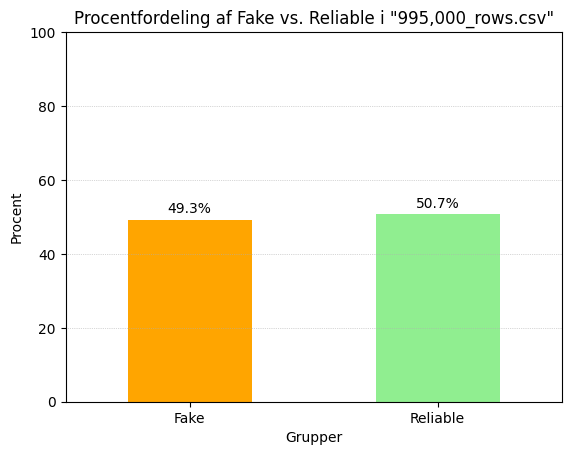

In [19]:
total = 218564+194518+27412+133232+104883+97314+56445+14040+13160+8779
type_distribution = pd.Series({'Fake':(133232+104883+97314+56445+14040+13160+8779)/total*100, 'Reliable':(218564+194518+27412)/total*100})
type_distribution.plot(kind='bar', color=['orange', 'lightgreen'], title='Procentfordeling af Fake vs. Reliable i "995,000_rows.csv"', xlabel='Grupper', ylabel='Procent')
for i, v in enumerate(type_distribution):
    plot.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')
plot.grid(True, axis='y', linestyle=':', linewidth=0.5)
plot.xticks(rotation=0)
plot.ylim(0, 100)
plot.show()

At grafen ændre sig så lidt, ved tilføjelsen af de nye artikler, betyder det at i teorien kunne det at tilføje de nye artikler, have mange effekter på datasættet, gode såvel som dårlige, men i praksis skal jeg skrabe mange flere artikler før at det at tilføje dem vil have en betydelig effekt på det samlede datasæt.